## 1. Load Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load the Data

In [2]:
# Load the dataset
forex = pd.read_csv("C:\\Users\\nitya\\Desktop\\Notes\\T5\\MLA-II\\ETE\\TS\\coversion.csv")
forex.shape

(1305, 7)

In [3]:
# Set 'Date' column as the index and convert it to datetime format
forex.index = pd.to_datetime(forex['Date'], format='%d-%m-%Y')

forex

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2019-01-09,09-01-2019,70.125000,70.629997,70.010002,70.330002,70.330002,0
2019-01-10,10-01-2019,70.550499,70.639999,70.320000,70.550499,70.550499,0
2019-01-11,11-01-2019,70.410004,70.570000,70.349998,70.720001,70.720001,0
2019-01-14,14-01-2019,70.370003,70.938004,70.269997,70.370003,70.370003,0
2019-01-15,15-01-2019,71.084999,71.139999,70.690002,71.084999,71.084999,0
...,...,...,...,...,...,...,...
2024-01-03,03-01-2024,83.257004,83.333702,83.246201,83.257004,83.257004,0
2024-01-04,04-01-2024,83.318100,83.360298,83.202103,83.318100,83.318100,0
2024-01-05,05-01-2024,83.240601,83.271599,83.035004,83.240601,83.240601,0


In [4]:
columns_to_select = ['Date', 'Close']
df = forex[columns_to_select].copy()

In [5]:
df.shape

(1305, 2)

In [33]:
df.head(10)

,Date,Close
Date,,
2019-01-09,09-01-2019,70.330002
2019-01-10,10-01-2019,70.550499
2019-01-11,11-01-2019,70.720001
2019-01-14,14-01-2019,70.370003
2019-01-15,15-01-2019,71.084999
2019-01-16,16-01-2019,71.092499
2019-01-17,17-01-2019,71.364998
2019-01-18,18-01-2019,71.030197
2019-01-21,21-01-2019,71.230003


## 3. Exploratory Data Analysis

In [7]:
# Check for missing values
df.isnull().sum()

Date     0
Close    0
dtype: int64

In [8]:
# Check for duplicates
df.duplicated().sum()

0

In [9]:
# Check data types
df.dtypes

Date      object
Close    float64
dtype: object

### Basic Summary Statistics

In [10]:
# Display basic summary statistics
df.describe()

,Close
count,1305.000000
mean,76.022822
std,4.472406
min,68.367599
25%,72.784798
50%,74.820000
75%,81.305298
max,85.194000


In [11]:
df

,Date,Close
Date,,
2019-01-09,09-01-2019,70.330002
2019-01-10,10-01-2019,70.550499
2019-01-11,11-01-2019,70.720001
2019-01-14,14-01-2019,70.370003
2019-01-15,15-01-2019,71.084999
...,...,...
2024-01-03,03-01-2024,83.257004
2024-01-04,04-01-2024,83.318100
2024-01-05,05-01-2024,83.240601


### Basic Visualization

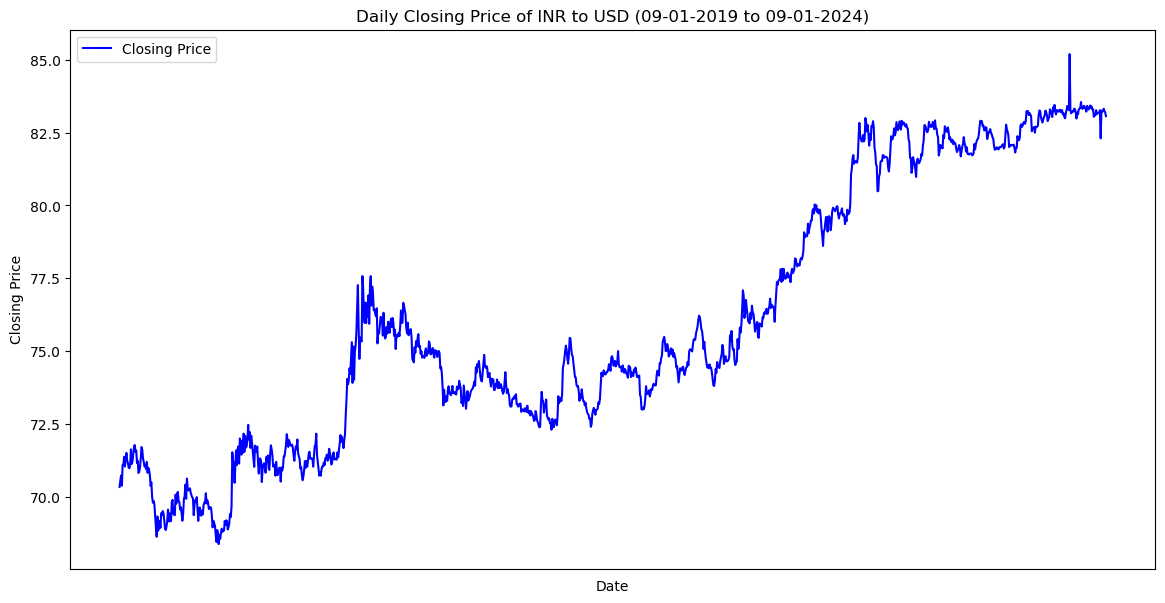

In [12]:
import matplotlib.pyplot as plt

# Plot the closing prices over time
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.title('Daily Closing Price of INR to USD (09-01-2019 to 09-01-2024)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()

# Hide x-axis ticks
plt.xticks([])

plt.show()

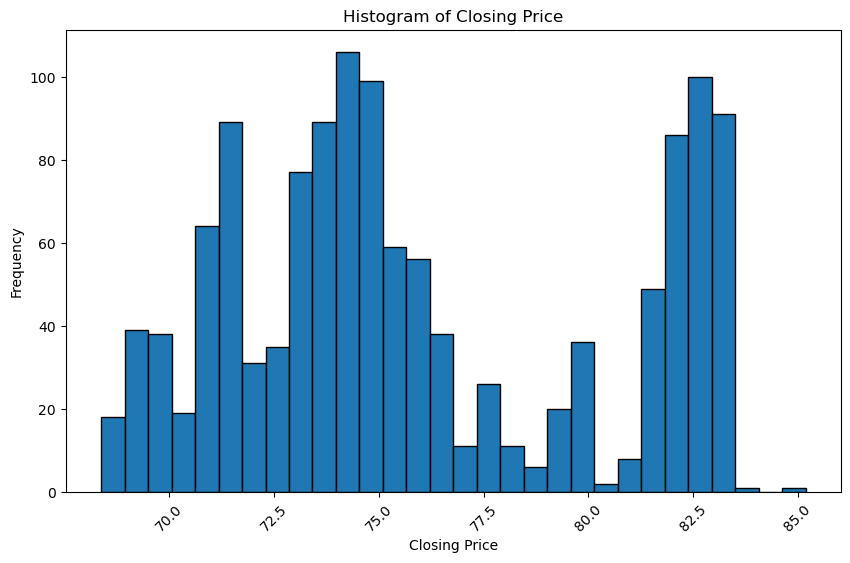

In [13]:
# Plot a histogram of closing prices
plt.figure(figsize=(10, 6))
plt.hist(df['Close'], bins=30, edgecolor='black')
plt.title('Histogram of Closing Price')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

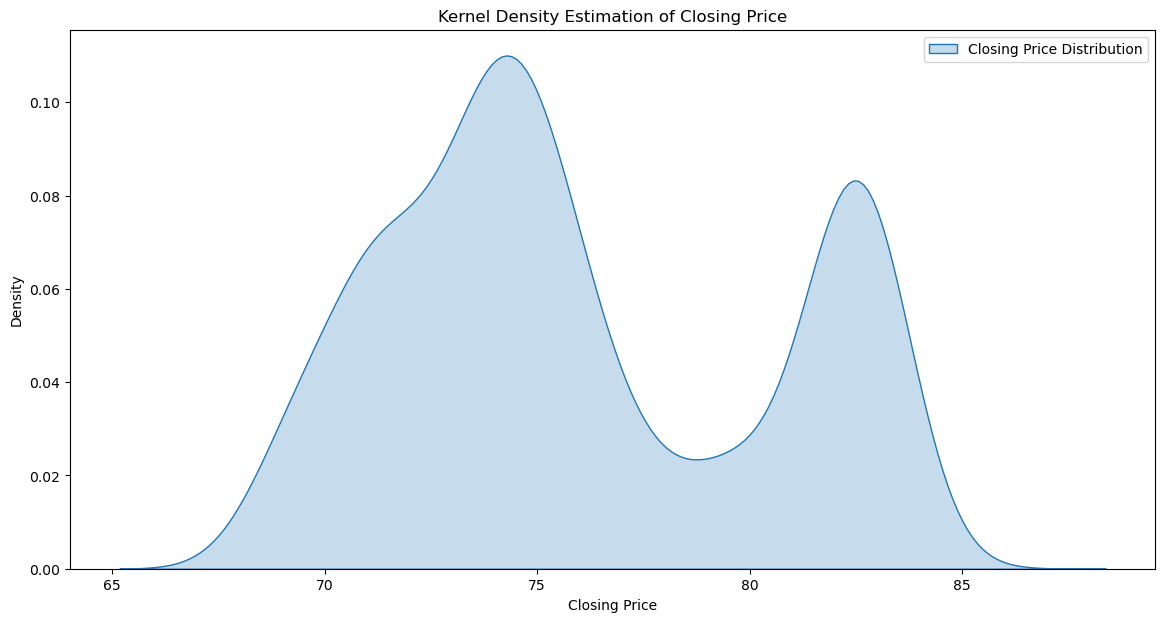

In [14]:
# Plot the distribution of closing prices over time
plt.figure(figsize=(14, 7))
sns.kdeplot(df['Close'], label='Closing Price Distribution', shade=True)
plt.title('Kernel Density Estimation of Closing Price')
plt.xlabel('Closing Price')
plt.legend()
plt.show()

In [15]:
price = df['Close']

In [16]:
import numpy as np

def df_to_X_y(df, window_size=5):
  indices = df.index
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y), indices

In [17]:
WINDOW_SIZE = 15
X, y, indices  = df_to_X_y(price, WINDOW_SIZE)
X.shape, y.shape

((1290, 15, 1), (1290,))

In [18]:
X

array([[[70.330002],
        [70.550499],
        [70.720001],
        ...,
        [70.989998],
        [70.974998],
        [71.090103]],

       [[70.550499],
        [70.720001],
        [70.370003],
        ...,
        [70.974998],
        [71.090103],
        [71.620003]],

       [[70.720001],
        [70.370003],
        [71.084999],
        ...,
        [71.090103],
        [71.620003],
        [71.120003]],

       ...,

       [[83.2966  ],
        [83.041702],
        [83.111198],
        ...,
        [83.202599],
        [83.257004],
        [83.3181  ]],

       [[83.041702],
        [83.111198],
        [83.091599],
        ...,
        [83.257004],
        [83.3181  ],
        [83.240601]],

       [[83.111198],
        [83.091599],
        [83.267197],
        ...,
        [83.3181  ],
        [83.240601],
        [83.191101]]])

In [19]:
X_train, y_train = X[:900], y[:900]
X_val, y_val = X[900:1000], y[900:1000]
X_test, y_test = X[1000:], y[1000:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((900, 15, 1), (900,), (100, 15, 1), (100,), (290, 15, 1), (290,))

In [20]:
y_test

array([81.630898, 81.305298, 81.162201, 81.422501, 81.899002, 82.3722  ,
       82.253502, 82.279198, 82.413002, 82.644699, 82.402496, 82.508003,
       82.857903, 82.725998, 82.581902, 82.636902, 82.878601, 82.874901,
       82.604103, 82.902901, 82.7761  , 82.851997, 82.835098, 82.749802,
       82.706001, 82.785698, 82.666496, 82.645203, 82.273399, 82.180099,
       81.637398, 81.631798, 81.115601, 81.278   , 81.652603, 81.525497,
       81.435997, 81.239799, 80.975998, 81.487999, 81.601898, 81.502701,
       81.445099, 81.508003, 81.579903, 81.768402, 81.710297, 82.045898,
       82.225998, 82.754997, 82.741898, 82.6595  , 82.533203, 82.513   ,
       82.597397, 82.867599, 82.737701, 82.695297, 82.758003, 82.697502,
       82.861198, 82.835297, 82.617897, 82.917999, 82.652   , 82.635399,
       82.419899, 82.355698, 81.712502, 81.854401, 82.0746  , 81.9645  ,
       82.018402, 81.958   , 82.417397, 82.304901, 82.715698, 82.622803,
       82.532997, 82.529099, 82.677002, 82.525803, 

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((WINDOW_SIZE, 1)))
model.add(LSTM(2500, activation='relu'))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2500)              25020000  
                                                                 
 dense (Dense)               (None, 1)                 2501      
                                                                 
Total params: 25022501 (95.45 MB)
Trainable params: 25022501 (95.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# Corrected model checkpoint variable name
cp = ModelCheckpoint('model', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=7, callbacks=[cp])

Epoch 1/7
29/29 [==============================] - ETA: 0s - loss: 528.3503 - root_mean_squared_error: 22.9859INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


29/29 [==============================] - 42s 1s/step - loss: 528.3503 - root_mean_squared_error: 22.9859 - val_loss: 16.6359 - val_root_mean_squared_error: 4.0787
Epoch 2/7
29/29 [==============================] - ETA: 0s - loss: 3.2372 - root_mean_squared_error: 1.7992INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


29/29 [==============================] - 35s 1s/step - loss: 3.2372 - root_mean_squared_error: 1.7992 - val_loss: 0.8665 - val_root_mean_squared_error: 0.9309
Epoch 3/7
29/29 [==============================] - 32s 1s/step - loss: 0.8956 - root_mean_squared_error: 0.9464 - val_loss: 3.5344 - val_root_mean_squared_error: 1.8800
Epoch 4/7
29/29 [==============================] - ETA: 0s - loss: 0.6754 - root_mean_squared_error: 0.8218INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


29/29 [==============================] - 34s 1s/step - loss: 0.6754 - root_mean_squared_error: 0.8218 - val_loss: 0.8156 - val_root_mean_squared_error: 0.9031
Epoch 5/7
29/29 [==============================] - ETA: 0s - loss: 0.4282 - root_mean_squared_error: 0.6544INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


29/29 [==============================] - 34s 1s/step - loss: 0.4282 - root_mean_squared_error: 0.6544 - val_loss: 0.7996 - val_root_mean_squared_error: 0.8942
Epoch 6/7
29/29 [==============================] - ETA: 0s - loss: 0.3679 - root_mean_squared_error: 0.6066INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


29/29 [==============================] - 34s 1s/step - loss: 0.3679 - root_mean_squared_error: 0.6066 - val_loss: 0.5115 - val_root_mean_squared_error: 0.7152
Epoch 7/7
29/29 [==============================] - 32s 1s/step - loss: 0.3433 - root_mean_squared_error: 0.5860 - val_loss: 0.7095 - val_root_mean_squared_error: 0.8423


In [23]:
# Calculate the mean
mean_y_train = np.mean(y_train)

# Print the result
print("Mean of y_train:", mean_y_train)

Mean of y_train: 73.4722974711111


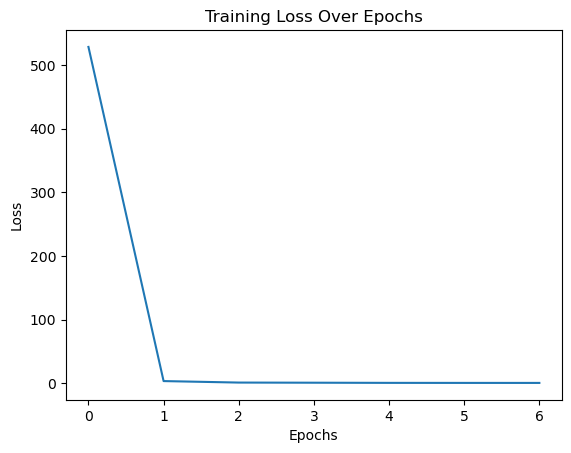

In [24]:
import matplotlib.pyplot as plt

# Plotting loss per epoch
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()

In [25]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 1s 136ms/step - loss: 0.5298 - root_mean_squared_error: 0.7279


[0.5298032164573669, 0.727875828742981]

10/10 [==============================] - 1s 124ms/step


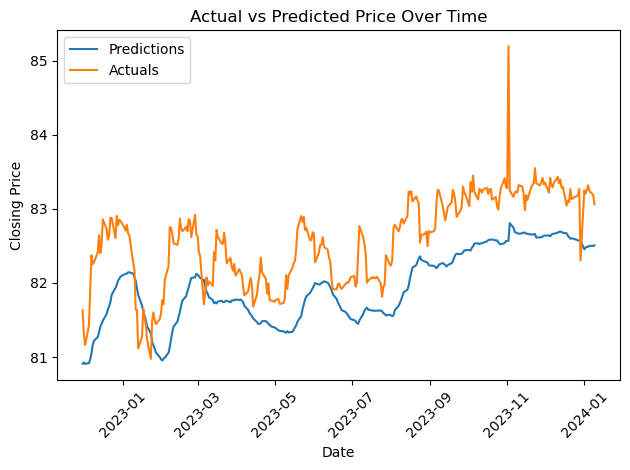

In [26]:
import matplotlib.pyplot as plt

# Get predictions
predictions = model.predict(X_test).flatten()
actuals = y_test.flatten()

plt.plot(indices[-len(predictions):], predictions, label='Predictions')
plt.plot(indices[-len(predictions):], actuals, label='Actuals')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Price Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
# Get predictions
predictions = model.predict(X_test).flatten()

# Define the number of days to forecast
forecast_days = 10

# Initialize an empty array to store forecasted prices
forecasted_prices = []

# Get the last WINDOW_SIZE days from your test data as the initial input
current_batch = X_test[-1].reshape((1, WINDOW_SIZE, 1))

# Make predictions for the next forecast_days days
for _ in range(forecast_days):
    current_pred = model.predict(current_batch)[0][0]
    forecasted_prices.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[[current_pred]]], axis=1)

# Convert the list of forecasted prices to a NumPy array
forecasted_prices = np.array(forecasted_prices).reshape(-1, 1)

# Add this line before displaying the DataFrame
forecast_df = pd.DataFrame({
    'Date': indices[-1] + pd.to_timedelta(np.arange(1, forecast_days + 1), 'D'),
    'Forecasted_Modal_Price': forecasted_prices.flatten()
})

1/1 [==============================] - 0s 90ms/step


In [28]:
# Display the DataFrame
with pd.option_context("display.max_columns", None, "display.max_rows", None):
    display(forecast_df.head())

,Date,Forecasted_Modal_Price
0,2024-01-10,82.506081
1,2024-01-11,82.425743
2,2024-01-12,82.356544
3,2024-01-13,82.288773
4,2024-01-14,82.227173


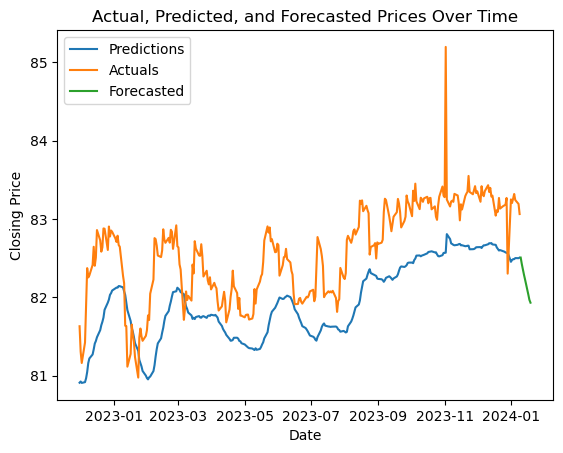

In [29]:
# Plot forecasted prices along with historical actual prices
plt.plot(indices[-len(predictions):], predictions, label='Predictions')
plt.plot(indices[-len(predictions):], y_test, label='Actuals')
plt.plot(indices[-1] + pd.to_timedelta(np.arange(1, forecast_days + 1), 'D'), forecasted_prices, label='Forecasted')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual, Predicted, and Forecasted Prices Over Time')
plt.legend()
plt.show()

In [32]:
forecast_df

,Date,Forecasted_Modal_Price
0,2024-01-10,82.506081
1,2024-01-11,82.425743
2,2024-01-12,82.356544
3,2024-01-13,82.288773
4,2024-01-14,82.227173
5,2024-01-15,82.164139
6,2024-01-16,82.099640
7,2024-01-17,82.035942
8,2024-01-18,81.967705
9,2024-01-19,81.931450
